https://www.geeksforgeeks.org/machine-learning/?ref=shm

https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/

https://www.hackerearth.com/practice/machine-learning/

https://www.youtube.com/channel/UCZQqrFW2VkirBF2a-aV1Fdw/playlists

https://www.youtube.com/c/joshstarmer/featured

NNs, Deep left

compare with sklearn implementation, sklearn like implementation

both regression and classification

wine: https://archive.ics.uci.edu/ml/datasets/Wine

car: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

air quality: https://archive.ics.uci.edu/ml/datasets/Air+Quality

## Load Data

In [38]:
import pandas as pd
import numpy as np
import scipy as sp

In [39]:
wine = pd.read_csv('./data/wine.data', header=None)
car = pd.read_csv('./data/car.data', header=None)
air = pd.read_excel('./data/AirQualityUCI.xlsx')

In [3]:
# car
# wine.iloc[:,0]

In [4]:
# air

## 1.Activation Functions

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

https://mlfromscratch.com/activation-functions-explained/#/

https://pytorch.org/docs/stable/nn.html

https://mlfromscratch.com/neural-networks-explained/#/

https://www.v7labs.com/blog/neural-networks-activation-functions

In [207]:
test_np = np.linspace(-10.0, 10.0, num=500)
test_tensor = torch.tensor(test_np, dtype=torch.float64)

In [209]:
def two_function_test(x, function1, function2):
    output_1 = function1(x)
    output_2 = function2(x)
    return torch.allclose(output_1,output_2), output_1
    # return output_1==output_2, output_1

def plot_array(x, y):
    plt.plot(x, y)

### Binary Step

In [210]:
def binary_step(x):
    return torch.where(x < 0, 0, 1)

In [211]:
output_binary_step = binary_step(test_tensor)

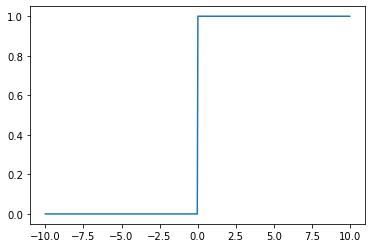

In [212]:
plot_array(test_np, output_binary_step)

### Linear

In [213]:
def linear(x):
    return x

In [214]:
output_linear = linear(test_tensor)

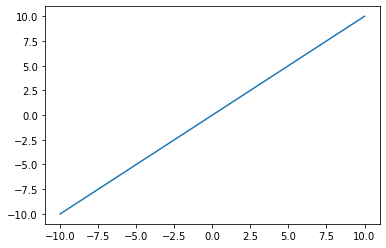

In [215]:
plot_array(test_np, output_linear)

### Tanh

In [216]:
def tanh(x):
    exp_plus = np.exp(x)
    exp_minus = np.exp(-1*x)
    tanh_ = (exp_plus-exp_minus)/(exp_plus+exp_minus)
    return tanh_

In [217]:
result, output_tanh = two_function_test(test_tensor, tanh, nn.Tanh())
# print(result)

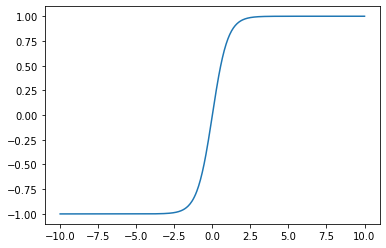

In [218]:
plot_array(test_np, output_tanh)

### Softmax

In [219]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x))

In [220]:
result, output_softmax = two_function_test(test_tensor, softmax, nn.Softmax())
# print(result)

tensor(1., dtype=torch.float64)


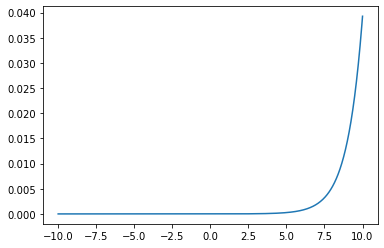

In [221]:
plot_array(test_np, output_softmax)
print(output_softmax.sum())

### Sigmoid

In [222]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [223]:
result, output_sigmoid = two_function_test(test_tensor, sigmoid, nn.Sigmoid())
# print(result)

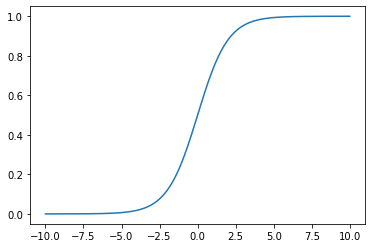

In [224]:
plot_array(test_np, output_sigmoid)

### ReLU


**Pros:**

    Less time and space complexity, because of sparsity, and compared to the sigmoid, it does not evolve the exponential operation, which are more costly.
    
    Avoids the vanishing gradient problem.

**Cons:**

    Introduces the dead relu problem, where components of the network are most likely never updated to a new value. This can sometimes also be a pro.
    
    ReLUs does not avoid the exploding gradient problem.

In [225]:
def relu(x):
    return np.maximum(x, 0)

In [226]:
result, output_relu = two_function_test(test_tensor, relu, nn.ReLU())
# print(result)

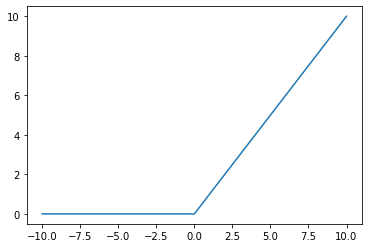

In [227]:
plot_array(test_np, output_relu)

### ELU

**Pros:**

    Avoids the dead relu problem.
    
    Produces negative outputs, which helps the network nudge weights and biases in the right directions.
    
    Produce activations instead of letting them be zero, when calculating the gradient.

**Cons:**

    Introduces longer computation time, because of the exponential operation included
    
    Does not avoid the exploding gradient problem
    
    The neural network does not learn the alpha value

In [228]:
def elu(x, alpha=1):
    return torch.where(x > 0, x, alpha*(np.exp(x)-1))

In [229]:
result, output_elu = two_function_test(test_tensor, elu, nn.ELU())
# print(result)

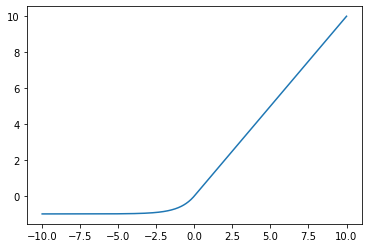

In [230]:
plot_array(test_np, output_elu)

### Leaky ReLU

**Pros:**

    Like the ELU, we avoid the dead relu problem, since we allow a small gradient, when computing the derivative.
    
    Faster to compute then ELU, because no exponential operation is included

**Cons:**

    Does not avoid the exploding gradient problem
    
    The neural network does not learn the alpha value
    
    Becomes a linear function, when it is differentiated, whereas ELU is partly linear and nonlinear.
    
    
### Parametric ReLU
    just the same as leaky relu but with any value for alpha

In [243]:
def leaky_relu(x, alpha=0.01):
    return torch.where(x > 0, x, alpha*x)

In [244]:
result, output_leaky_relu = two_function_test(test_tensor, leaky_relu, nn.LeakyReLU())
# print(result)

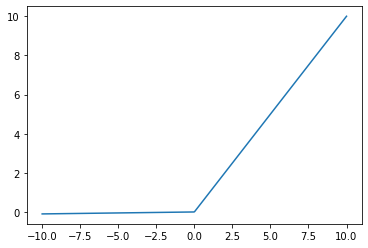

In [245]:
plot_array(test_np, output_leaky_relu)

### Swish

Here are a few advantages of the Swish activation function over ReLU:

    Swish is a smooth function that means that it does not abruptly change direction like ReLU does near x = 0. Rather, it smoothly bends from 0 towards values < 0 and then upwards again.

    Small negative values were zeroed out in ReLU activation function. However, those negative values may still be relevant for capturing patterns underlying the data. Large negative values are zeroed out for reasons of sparsity making it a win-win situation.

    The swish function being non-monotonous enhances the expression of input data and weight to be learnt.

In [247]:
def swish(x):
    return x*sigmoid(x)

In [248]:
output_swish = swish(test_tensor)

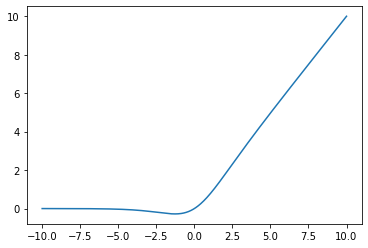

In [249]:
plot_array(test_np, output_swish)

### SELU

**Pros:**

    Internal normalization is faster than external normalization, which means the network converges faster.
    
    Vanishing and exploding gradient problem is impossible, shown by their theorems 2 & 3 in the appendix.

**Cons:**

    Relatively new activation function – needs more papers on architectures such as CNNs and RNNs, where it is comparatively explored. 

In [133]:
def selu(x, alpha=1.6732632423543772848170429916717, lambda_=1.0507009873554804934193349852946):
    return lambda_ * elu(x, alpha)

In [135]:
result, output_selu = two_function_test(test_tensor, selu, nn.SELU())
# print(result)

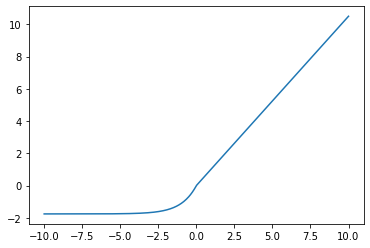

In [136]:
plot_array(test_np, output_selu)

    The output of a SELU is normalized, which could be called internal normalization, hence the fact that all the outputs are with a mean of zero and standard deviation of one, as just explained. This is different from external normalization, where batch normalization and other methods are used.

### GELU

**Pros:**

    Seems to be state-of-the-art in NLP, specifically Transformer models – i.e. it performs best
    
    Avoids vanishing gradients problem

**Cons:**

    Fairly new in practical use, although introduced in 2016.

In [303]:
def gelu(x):
    tanh_arg = (torch.sqrt(torch.tensor(2/np.pi))) * (x + (0.044715 * torch.pow(x, 3)))
    gelu_ = 0.5*x*(1 + tanh(tanh_arg))
    return gelu_

In [312]:
result, output_gelu = two_function_test(test_tensor, gelu, nn.GELU(approximate="tanh"))
# print(result)

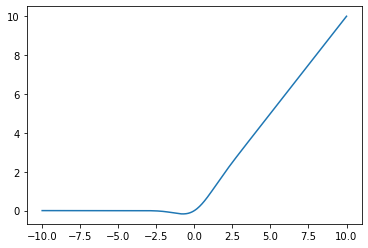

In [313]:
plot_array(test_np, output_gelu)

### How to choose the right Activation Function?

    You need to match your activation function for your output layer based on the type of prediction problem that you are solving—specifically, the type of predicted variable.

    Here’s what you should keep in mind.

    As a rule of thumb, you can begin with using the ReLU activation function and then move over to other activation functions if ReLU doesn’t provide optimum results.
    
    
    And here are a few other guidelines to help you out.

    1.ReLU activation function should only be used in the hidden layers.
    2.Sigmoid/Logistic and Tanh functions should not be used in hidden layers as they make the model more susceptible to problems during training (due to vanishing gradients).
    3.Swish function is used in neural networks having a depth greater than 40 layers.
    
    Finally, a few rules for choosing the activation function for your output layer based on the type of prediction problem that you are solving:
    
    1.Regression - Linear Activation Function
    2.Binary Classification—Sigmoid/Logistic Activation Function
    3.Multiclass Classification—Softmax
    4.Multilabel Classification—Sigmoid
    
    The activation function used in hidden layers is typically chosen based on the type of neural network architecture.
    
    1.Convolutional Neural Network (CNN): ReLU activation function.
    2.Recurrent Neural Network: Tanh and/or Sigmoid activation function.
    
    

## 2.MLE

https://mlfromscratch.com/probability-distributions-and-densities/#/

https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

https://alemorales.info/post/mle-nonlinear/

https://www.youtube.com/watch?v=rzFX5NWojp0

https://www.youtube.com/watch?v=XepXtl9YKwc

https://www.youtube.com/watch?v=Dn6b9fCIUpM

https://www.youtube.com/watch?v=J8jNoF-K8E8

https://www.youtube.com/watch?v=4KKV9yZCoM4

https://www.youtube.com/watch?v=p3T-_LMrvBc

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

    The approach is to find the likelihood of points and put its derivative to zero and find the parameters we want by solving the equiations

In [414]:
import sympy as sp
from sympy.solvers import solve
from sympy import Symbol

### Normal

In [415]:
normal_sample_data = np.random.normal(loc=2.5, scale=1, size=1000)

In [416]:
def normal_mle(data):
    # equations has been solved to find these answers!
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

In [417]:
normal_mle(normal_sample_data)

(2.4825169060649155, 1.0101378170643203)

### Exponential

In [418]:
exponential_sample_data = np.random.exponential(scale=1.0, size=1000)

In [419]:
def exponential_mle(data):
    # equations has been solved to find these answers!
    sum_ = np.sum(data)
    lambda_ = len(data) / sum_
    return lambda_

In [420]:
exponential_mle(exponential_sample_data)

0.9805514601613581

### Binomial

In [421]:
binomial_sample_data = np.random.binomial(n=14, p=0.6, size=1000)

In [422]:
def binomial_mle(data, n):
    # equations has been solved to find these answers!
    mean = np.mean(data)
    p = mean / n
    return p

In [423]:
binomial_mle(binomial_sample_data, n=14)

0.6021428571428571

## 3. CV - GridSearch - Metrics

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/cross_validation.html

### CV

### Metrics

https://www.qualdo.ai/blog/complete-list-of-performance-metrics-for-monitoring-regression-models/

https://scikit-learn.org/stable/modules/model_evaluation.html

https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

https://www.investopedia.com/terms/r/r-squared.asp

https://www.saedsayad.com/mlr.htm

https://www.youtube.com/watch?v=2AQKmw14mHM

https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

https://www.educba.com/python-print-table/

https://stats.stackexchange.com/questions/210168/what-is-the-difference-between-r2-and-variance-score-in-scikit-learn

https://www.youtube.com/watch?v=JC56jS2gVUE *

https://www.youtube.com/watch?v=9T0wlKdew6I

https://quantifyinghealth.com/deviance-in-logistic-regression/

https://scikit-learn.org/stable/modules/model_evaluation.html#d2-score

https://www.youtube.com/watch?v=pYxNSUDSFH4

https://www.youtube.com/watch?v=J0yuLu3oLuU

left:

metrics.mean_poisson_deviance, metrics.mean_gamma_deviance, metrics.d2_absolute_error_score, metrics.d2_pinball_score, metrics.d2_tweedie_score

**p-value**

https://www.youtube.com/watch?v=5Z9OIYA8He8

https://www.youtube.com/watch?v=vemZtEM63GY

https://www.youtube.com/watch?v=JQc3yx0-Q9E


In [11]:
def print_result_string_generator(metrics_to_print, metrics_name):
    out = ""
    for metric, name in zip(metrics_to_print, metrics_name):
        # print(name, metric)
        s = "{:<20} {:<15} \n".format(name, metric)
        out += s
    return out

In [12]:
def inputs_length_check(y_test, yhat):
    length = len(yhat)
    assert length==len(y_test)
    return length
    
def mean_absolute_error(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.mean_absolute_error(y_test, yhat)
    
    length = inputs_length_check(y_test, yhat)
    return np.sum(np.abs(np.subtract(y_test, yhat)))/length

def mean_squared_error(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.mean_squared_error(y_test, yhat)

    length = inputs_length_check(y_test, yhat)
    return np.sum(np.power(np.subtract(y_test, yhat), 2))/length

def root_mean_squared_error(y_test, yhat, sklearn_=False):
    return np.sqrt(mean_squared_error(y_test, yhat, sklearn_))

def root_mean_squared_log_error(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.mean_squared_log_error(y_test, yhat)
    return np.log(root_mean_squared_error(y_test, yhat))

def median_absolute_error(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.median_absolute_error(y_test, yhat)
    
    length = inputs_length_check(y_test, yhat)
    return np.median(np.abs(np.subtract(y_test, yhat)))

def r2_score(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.r2_score(y_test, yhat)
    
    ssr = np.sum(np.power(np.subtract(y_test, yhat), 2))
    ssm = np.sum(np.power(np.subtract(y_test, np.mean(y_test)), 2))
    r2 = 1 - (ssr/ssm)
    return r2

def adjusted_r2_score(y_test, yhat, X_test, sklearn_=False):
    n = len(y_test)
    k = len(X_test[0])
    r2 = r2_score(y_test, yhat, sklearn_)
    adjusted_r2 = 1 - (((n-1)/(n-k-1))*(1-r2))
    return adjusted_r2

def explained_variance_score(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.explained_variance_score(y_test, yhat)
    
    var_score = 1 - (np.var(yhat-y_test)/np.var(y_test))
    return var_score

def max_error(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.max_error(y_test, yhat)
    
    return np.max(yhat - y_test)

def mean_absolute_percentage_error(y_test, yhat, sklearn_=False):
    if sklearn_:
        return metrics.mean_absolute_percentage_error(y_test, yhat)
    
    epsilon = np.finfo(np.float64).eps
    
    ape = np.abs(((yhat-y_test)/np.maximum(y_test, epsilon)))
    # ape = np.abs((yhat/np.maximum(y_test, epsilon))-1)
    
    return np.mean(ape)

# def log_lokelihood_calculator(data):
#     mean = np.mean(data)
#     std = np.std(data)
    
#     log_lokelihood = np.log(np.sum(sp.stats.norm.pdf(data,mean,std)))
#     return log_lokelihood

# def deviance(data):
#     deviance_value = -2 * log_lokelihood_calculator(data)
#     return deviance_value

# def d2_absolute_error_score(y_test, yhat, mode="LL"):
#     if mode=="LL":
#         length = len(yhat)
#         null_data = np.tile(np.mean(y_test), length)
#         d2 = 1 - (log_lokelihood_calculator(yhat)/log_lokelihood_calculator(null_data))

#     return d2

# def calculate_dev(y_true,y_pred):
#     epsilon = np.finfo(np.float64).eps
#     log_arg = np.maximum(y_true/y_pred, epsilon)

#     return (2*(y_true * np.log(log_arg) - (y_true-y_pred))).sum()

# 1 - (calculate_dev(y_test_air,lr.predict(X_test_air))/calculate_dev(y_test_air,np.mean(y_test_air)))


def model_evaluater(yhat=None, y_test=None,  X_test= None, model=None, task="regression", sklearn_=False):
    if model is not None:
        yhat = model.predict(X_test)
        
    if task == "regression":
        mse = mean_squared_error(y_test, yhat, sklearn_)
        rmse = root_mean_squared_error(y_test, yhat, sklearn_)
        # rmsle = root_mean_squared_log_error(y_test, yhat, sklearn_)
        mae = mean_absolute_error(y_test, yhat, sklearn_)
        medianae = median_absolute_error(y_test, yhat, sklearn_)
        r2_score_ = r2_score(y_test, yhat, sklearn_)
        adjusted_r2 = adjusted_r2_score(y_test, yhat, X_test, sklearn_)
        mape = mean_absolute_percentage_error(y_test, yhat, sklearn_)
        explained_var = explained_variance_score(y_test, yhat, sklearn_)
        max_error_ = max_error(y_test, yhat, sklearn_)
        # mean_poisson_deviance_ = metrics.mean_poisson_deviance(y_test, yhat)
        d2_absolute_error = metrics.d2_absolute_error_score(y_test, yhat)

        metrics_to_print = [mse, rmse, mae, medianae, r2_score_, mape, explained_var, max_error_, d2_absolute_error]
        metrics_name = ['mse', 'rmse', 'mae', 'medianae', 'r2_score', 'mape', 'explained_var', 'max_error', 'd2_absolute_error']
        print(print_result_string_generator(metrics_to_print, metrics_name))

**R Squared: Accuracy Of The Multiple Linear Regression Model**

```lr.score(X_test, y_test)```

In [13]:
# mean_absolute_error(lr.predict(X_test_air), y_test_air)
# mean_squared_error(lr.predict(X_test_air), y_test_air)
# root_mean_squared_error(lr.predict(X_test_air), y_test_air)
# root_mean_squared_log_error(lr.predict(X_test_air), y_test_air)
# median_absolute_error(lr.predict(X_test_air), y_test_air)
# r2_score(lr.predict(X_test_air), y_test_air)
# adjusted_r2_score(lr.predict(X_test_air), y_test_air, X_test_air)
# explained_variance_score(lr.predict(X_test_air), y_test_air)
# max_error(lr.predict(X_test_air), y_test_air)
# mean_absolute_percentage_error(lr.predict(X_test_air), y_test_air)
# d2_absolute_error_score(lr.predict(X_test_air), y_test_air)

## 4. Feature Engineering

https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/

https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kdnuggets.com/2021/06/feature-selection-overview.html

## 5.Optimizers and LR schedulers

https://peltarion.com/knowledge-center/modeling-view/run-a-model/optimization-principles-(in-deep-learning)/learning-rate-schedule

https://mlfromscratch.com/optimizers-explained/#/

### LR schedulers

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b


**1.Learning rate decay (common method):**

α = ( 1 / ( 1 + decayRate * epochNumber ) ) * α0

1 epoch : 1 pass through data

α : learning rate (current iteration)

α0 : Initial learning rate

decayRate : hyper-parameter for the method

**2.Exponential Decay:**

α = ( e ^ ( -decayRate * epochNumber) ) * α0

**3.Step Decay:**

α = drop^floor( epoch / epochs_drop ) * α0

**4.Epoch Number Based:**

α = ( k/ √epochNumber ) * α0

In this method we take some constant ‘k’ and divide it with square root of epoch number.

**5.Mini-batch Number based:**

α = ( k/ √t) * α0

In this method we take some constant ‘k’ and divide it with square root of Mini-Batch number. (This method is only used for Mini Batch Gradient Descent.)

**6.Manual Decay:**

In this method practitioners manually examine the performance of algorithm and decrease the learning rate manually day by day or hour by hour etc.

In [14]:
def learning_rate_scheduler(lr, mode=0, epoch=None, decay_rate=0, epochs_drop=10, initial_lr=1):
    epoch+=1
    # mode: 0:constant, 1:lr-decay, 2:exponential, 3:step, 4:epoch number based (and just like mini-batch mode) 
    if mode==0:
        lr = lr
        
    elif mode==1:
        lr *= 1/(1+decay_rate*epoch)
        
    elif mode==2:
        lr = initial_lr * np.exp(-1*decay_rate*epoch)
        
    elif mode==3:
        lr = initial_lr * np.power(decay_rate, (epoch//epochs_drop))
    
    elif mode==4:
        lr *= decay_rate/np.sqrt(epoch)
        
    return lr

In [15]:
print(learning_rate_scheduler(lr=1, mode=0, epoch=20, decay_rate=0.5))
print(learning_rate_scheduler(lr=1, mode=1, epoch=20, decay_rate=0.5))
print(learning_rate_scheduler(lr=1, mode=2, epoch=20, decay_rate=0.5))
print(learning_rate_scheduler(lr=1, mode=3, epoch=20, decay_rate=0.5, epochs_drop=10))
print(learning_rate_scheduler(lr=1, mode=4, epoch=20, decay_rate=0.5))

1
0.08695652173913043
2.7536449349747158e-05
0.25
0.1091089451179962


## 6.Linear Regression

https://www.askpython.com/python/examples/linear-regression-from-scratch

https://faun.pub/implementing-multiple-linear-regression-from-scratch-in-python-f5d84d4935bb

https://mlfromscratch.com/linear-regression-from-scratch/#/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.hackerearth.com/practice/machine-learning/linear-regression/multivariate-linear-regression-1/tutorial/

https://www.youtube.com/watch?v=nk2CQITm_eo *

https://www.youtube.com/watch?v=zITIFTsivN8 *

### Imports

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Data preprocessing

https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html

https://www.geeksforgeeks.org/data-normalization-with-pandas/

https://datagy.io/pandas-normalize-column/

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [17]:
def df_scaler(df, mode=0):
    if mode==0:
        scaler = MinMaxScaler()
        scaler.fit(df)
        scaled = scaler.transform(df)
        scaled_df = pd.DataFrame(scaled, columns=df.columns)
        
    elif mode==1:
        scaled_df = df.copy()
        for column in scaled_df.columns:
            scaled_df[column] = column_scaler(scaled_df[column])

    return df, scaled_df


def column_scaler(column):
    normalized = (column - column.min())/(column.max() - column.min())
    return normalized

In [18]:
def air_dataset_split(air):
    x_air = air.iloc[:,:-1].values
    y_air = air.iloc[:,-1].values

    X_train, X_test, y_train, y_test = train_test_split(x_air, y_air, test_size=0.33)
    return X_train, X_test, y_train, y_test

In [19]:
air, air_scaled = df_scaler(air.iloc[:,2:], mode=1)
X_train_air, X_test_air, y_train_air, y_test_air = air_dataset_split(air_scaled)

### Sklearn implementation

In [20]:
lr = LinearRegression().fit(X_train_air, y_train_air)

### From Scratch

In [21]:
class Linear_Regression:
    def __init__(self):
        self.weights = 0
        self.bias = 0
    
    
    def predict(self, x):
        y = np.dot(self.weights, x.T) +  self.bias
        return y

    def compute_gradients(self, x, y, lr, fast=True):
        gradient_w = 0
        gradient_b = 0
        
        loss = self.predict(x)-y
        
        if not fast:
            for i in range(len(x)):
                value = loss[i]
                gradient_w += value*x[i]
                gradient_b += value

        else:
            gradient_w = np.sum(x.T * loss, axis=1)
            gradient_b = np.sum(loss)
            
        ratio = lr/len(x)
        gradient_w *= ratio
        gradient_b *= ratio
        return gradient_w, gradient_b   
    
    def parameters_initialize(self, x, mode="zero"):
        if mode == "zero":
            self.weights = np.ones_like(x[0])
            self.bias = 0       
        elif mode == "random":
            self.weights = np.random.rand(x.shape[1])
            self.bias = np.random.rand(1)

    
    def fit(self, x, y, epochs=1000, lr=0.001, init_mode="zero", lr_schedule_mode=0, fast=True, solve=False):
        if solve:
            self.ols_solve(x, y)
        else:
            initial_lr = lr
            self.parameters_initialize(x=x, mode=init_mode)

            for i in range(epochs):
                lr = learning_rate_scheduler(lr=lr, mode=lr_schedule_mode, epoch=i, decay_rate=0.3, epochs_drop=100, initial_lr=initial_lr)
                # print(i, lr)

                gradient_w, gradient_b = self.compute_gradients(x, y, lr, fast=fast)

                self.weights -= gradient_w
                self.bias -= gradient_b

    def ols_solve(self, x, y):
        x = np.insert(x, 0, np.ones(x.shape[0]), axis=1)
        parameters = np.linalg.inv(np.dot(x.T, x)).dot(x.T).dot(y)
        self.weights = parameters[1:]
        self.bias = parameters[0]

In [22]:
# solve
lr_from_scratch = Linear_Regression()

lr_from_scratch.fit(X_train_air, y_train_air, solve=True)

In [23]:
# Gradient Descent
lr_from_scratch_gd = Linear_Regression()

lr_from_scratch_gd.fit(X_train_air, y_train_air, epochs=10000, lr=0.2, lr_schedule_mode=0)

### Metrics

In [24]:
model_evaluater(y_test=y_test_air, model = lr_from_scratch_gd, X_test = X_test_air, task="regression", sklearn_=False)

mse                  5.86029699861896e-05 
rmse                 0.007655257669483739 
mae                  0.005916280914307644 
medianae             0.005118502128621749 
r2_score             0.9983320564509716 
mape                 1002558523143.6349 
explained_var        0.9983323286215717 
max_error            0.06536048511381098 
d2_absolute_error    0.8453859208013206 



In [25]:
model_evaluater(y_test=y_test_air, model = lr, X_test = X_test_air, task="regression", sklearn_=False)

mse                  2.5502355836644334e-05 
rmse                 0.005049985726380257 
mae                  0.003754056520776206 
medianae             0.0030266867994574453 
r2_score             0.9992741581200956 
mape                 523861177266.8524 
explained_var        0.9992742398859965 
max_error            0.05018312889361298 
d2_absolute_error    0.9018927598897598 



In [26]:
model_evaluater(y_test=y_test_air, model = lr_from_scratch, X_test = X_test_air, task="regression", sklearn_=False)

mse                  2.5502355836585343e-05 
rmse                 0.005049985726374416 
mae                  0.003754056520865258 
medianae             0.003026686799491307 
r2_score             0.9992741581200972 
mape                 523861177248.73785 
explained_var        0.9992742398859953 
max_error            0.050183128892502094 
d2_absolute_error    0.9018927598874326 



In [315]:
# optimizer, feature engineering, metrics, bapir adj r2 and meaning, pvalue calculation, central limit theorem

In [28]:
# https://www.machinelearningplus.com/statistics/what-is-p-value/
# https://realpython.com/numpy-scipy-pandas-correlation-python/

In [29]:
# from scipy import stats

# def scores_calculator(x, y):
#     # a = stats.pearsonr(x, y)
#     # b = stats.spearmanr(x, y)
#     # c = stats.kendalltau(x, y)
#     d = stats.ttest_ind(x, y)
#     # print(a)
#     # print(b)
#     # print(c)
#     print(d)
#     # return a, (b.correlation, b.pvalue), (c.correlation, c.pvalue), (d.statistic, d.pvalue)

In [30]:
# for i in range(X_test_air.shape[1]):
#     x_random = np.random.random(y_test_air.shape)
#     x_true = X_test_air[:,i]
#     y_true = y_test_air
#     yhat = lr.predict(X_test_air)
    
#     scores_calculator(x_true, y_true)
#     print("================================")


# print(stats.ttest_ind(np.random.random(y_test_air.shape), np.random.random(y_test_air.shape)).pvalue)

In [31]:
# scores_calculator(lr.coef_, y_true)

## 7.Logistic Regression

https://www.askpython.com/python/examples/logistic-regression-from-scratch

https://www.javatpoint.com/logistic-regression-in-machine-learning

multi: https://www.alpha-quantum.com/blog/logistic-regression/logistic-regression-from-scratch/

https://www.youtube.com/watch?v=yIYKR4sgzI8

## 8.KNN

https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

https://mlfromscratch.com/measures-of-distance-similarity-and-dissimilarity/

https://www.youtube.com/watch?v=HVXime0nQeI

## 9.SVM

https://github.com/adityajn105/SVM-From-Scratch

https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2

https://machinelearningmastery.com/method-of-lagrange-multipliers-the-theory-behind-support-vector-machines-part-3-implementing-an-svm-from-scratch-in-python/

https://www.kdnuggets.com/2020/03/machine-learning-algorithm-svm-explained.html

https://www.analytixlabs.co.in/blog/introduction-support-vector-machine-algorithm/

https://www.youtube.com/watch?v=efR1C6CvhmE

https://www.youtube.com/watch?v=Toet3EiSFcM

https://www.youtube.com/watch?v=Qc5IyLW_hns

## 10.SOM
NN hws

## 11.LVQ
NN hws

## 12.Regularization

https://www.einfochips.com/blog/regularization-make-your-machine-learning-algorithms-learn-not-memorize/

https://harish-reddy.medium.com/regularization-in-python-699cfbad8622

https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/

https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning

https://medium.com/analytics-vidhya/understanding-regularization-algorithms-450777fa0ed3

https://www.youtube.com/watch?v=Q81RR3yKn30

https://www.youtube.com/watch?v=NGf0voTMlcs

https://www.youtube.com/watch?v=1dKRdX9bfIo

https://www.youtube.com/watch?v=Xm2C_gTAl8c

## 13.Decision Tree

https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

https://insidelearningmachines.com/build-a-decision-tree-in-python/

https://mlfromscratch.com/decision-tree-classification/

https://www.youtube.com/watch?v=_L39rN6gz7Y

https://www.youtube.com/watch?v=g9c66TUylZ4

## 14.Naive Bayes

https://philippmuens.com/naive-bayes-from-scratch

https://blog.devgenius.io/implementing-na%C3%AFve-bayes-classification-from-scratch-with-python-badd5a9be9c3

https://medium.com/@johnm.kovachi/implementing-a-multinomial-naive-bayes-classifier-from-scratch-with-python-e70de6a3b92e

https://evidencen.com/gnbclassification/

## 15. ROC and AUC

https://www.youtube.com/watch?v=4jRBRDbJemM

## 16.K-means K-medians

https://www.youtube.com/watch?v=4b5d3muPQmA

https://www.askpython.com/python/examples/k-means-clustering-from-scratch

https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670

https://medium.com/@pasdan/k-clustering-means-medians-via-python-2a5f251582ee

## 17.Hierarchical Clustering

https://www.youtube.com/watch?v=7xHsRkOdVwo

https://www.mltut.com/hierarchical-clustering-in-python-step-by-step-complete-guide/

## 18.PCA, SVD, LDA

https://mlfromscratch.com/principal-component-analysis-pca-svd/#/

https://www.youtube.com/watch?v=FgakZw6K1QQ

https://www.askpython.com/python/examples/principal-component-analysis

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

--------------

https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html

https://www.youtube.com/watch?v=azXCzI57Yfc

--------------

https://www.depends-on-the-definition.com/lda-from-scratch/

https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2

https://ai.plainenglish.io/fischers-linear-discriminant-analysis-in-python-from-scratch-bbe480497504

## 19.Random Forest

https://mlfromscratch.com/random-forest/#/

https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

https://www.youtube.com/watch?v=sQ870aTKqiM

https://carbonati.github.io/posts/random-forests-from-scratch/

https://insidelearningmachines.com/build-a-random-forest-in-python/

https://www.askpython.com/python/examples/random-forest-regression

https://www.analyticsvidhya.com/blog/2018/12/building-a-random-forest-from-scratch-understanding-real-world-data-products-ml-for-programmers-part-3/

## 20.Boosting

https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5

https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

https://www.ibm.com/cloud/learn/boosting

https://howtolearnmachinelearning.com/articles/boosting-in-machine-learning/



## 21.Bagging

https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning

https://insidelearningmachines.com/build-a-bagging-classifier-in-python/

https://www.section.io/engineering-education/implementing-bagging-algorithms-in-python/

https://www.mygreatlearning.com/blog/bagging-boosting/

## 22.Voting

https://machinelearningmastery.com/voting-ensembles-with-python/

http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/

https://www.kaggle.com/code/saurabhshahane/voting-classifier

## 23.Stacking

https://mlfromscratch.com/model-stacking-explained/#/

https://machinelearningmastery.com/implementing-stacking-scratch-python/

https://towardsai.net/p/l/machine-learning-model-stacking-in-python

## 24.AdaBoost

https://www.youtube.com/watch?v=LsK-xG1cLYA

https://www.youtube.com/watch?v=Xz0x-8-cgaQ

https://www.youtube.com/watch?v=SEwxvjfxxmE

https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50

https://www.mygreatlearning.com/blog/adaboost-algorithm/

https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

## 25.Gradient Boosting

https://www.youtube.com/watch?v=3CC4N4z3GJc

https://www.youtube.com/watch?v=2xudPOBz-vs

https://www.youtube.com/watch?v=jxuNLH5dXCs

https://www.youtube.com/watch?v=StWY5QWMXCw

https://www.analyticsvidhya.com/blog/2021/04/how-the-gradient-boosting-algorithm-works/

https://www.wallstreetmojo.com/gradient-boosting/

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

## 26.XGBoost

https://www.youtube.com/watch?v=OtD8wVaFm6E

https://www.youtube.com/watch?v=8b1JEDvenQU

https://www.youtube.com/watch?v=ZVFeW798-2I

https://www.youtube.com/watch?v=oRrKeUCEbq8

https://www.mygreatlearning.com/blog/xgboost-algorithm/

https://www.geeksforgeeks.org/xgboost/

https://blog.jovian.ai/machine-learning-with-python-implementing-xgboost-and-random-forest-fd51fa4f9f4c

https://www.analytixtime.com/post/xgboostregression-from-scratch-in-excel/